<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/Prediction_of_Poisonous_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle competitions download -c playground-series-s4e8

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
dir

<function dir>

In [1]:
!mkdir ~/kaggle


In [2]:
!cat kaggle.json

cat: kaggle.json: No such file or directory


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shabahmd","key":"99d24913ec7e5ea2ee827e4966f34774"}'}

In [4]:
!mkdir ~/.kaggle


In [5]:
!mv kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle competitions download -c playground-series-s4e8

 96% 79.0M/82.3M [00:00<00:00, 178MB/s]
100% 82.3M/82.3M [00:00<00:00, 166MB/s]


In [8]:
!unzip  playground-series-s4e8.zip

Archive:  playground-series-s4e8.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_df = pd.read_csv('train.csv')

In [11]:
print(train_df.describe())
print(train_df.info())

                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-atta

In [11]:
train_df.isnull().sum()

,0
id,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57


In [12]:
train_df.head(20)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [14]:
high_missing_cols  = ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']
train_df.drop(columns = high_missing_cols)

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,u,f,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,o,f,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,b,f,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,g,f,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,w,f,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,n,t,w,12.14,18.81,w,t,g,d,u
3116941,3116941,e,10.88,s,w,t,p,6.65,26.97,w,f,f,d,u
3116942,3116942,p,7.82,x,e,f,w,9.51,11.06,y,t,z,d,a
3116943,3116943,e,9.45,p,n,t,p,9.13,17.77,w,t,p,d,u


In [15]:
from sklearn.impute import SimpleImputer

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
train_df['cap-diameter'] = num_imputer.fit_transform(train_df[['cap-diameter']])

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['cap-color', 'does-bruise-or-bleed', 'gill-color',
                       'stem-color', 'has-ring', 'habitat']
train_df[categorical_columns] = cat_imputer.fit_transform(train_df[categorical_columns])


In [16]:
train_df.isnull().sum()

,0
id,0
class,0
cap-diameter,0
cap-shape,40
cap-surface,671023
cap-color,0
does-bruise-or-bleed,0
gill-attachment,523936
gill-spacing,1258435
gill-color,0


In [18]:
(train_df["stem-color"].isnull().sum() / len(train_df)) * 100


0.0

In [19]:
train_df = pd.get_dummies(train_df, drop_first=True)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_columns = ['cap-diameter', 'stem-height', 'stem-width']
train_df[continuous_columns] = scaler.fit_transform(train_df[continuous_columns])


SyntaxError: invalid syntax (<ipython-input-21-38e9e33c87a8>, line 1)

In [ ]:
train_df.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is already prepared (with encoded categorical variables and scaled numerical features)

# Separate features and target variable
X = train_df.drop(columns=['class'], axis =1)  # Features
y = train_df['class']  # Target: Poisonous or not

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is already prepared (with encoded categorical variables and scaled numerical features)

# Check if 'class' column exists. If not, look for columns that might represent the class
if 'class' not in train_df.columns:
    possible_class_columns = [col for col in train_df.columns if 'class' in col]
    if possible_class_columns:
        print(f"Possible class columns found: {possible_class_columns}")
        # Choose the appropriate class column and replace 'chosen_class_column' below
        chosen_class_column = possible_class_columns[0]
        X = train_df.drop(columns=[chosen_class_column], axis=1)  # Features
        y = train_df[chosen_class_column]  # Target: Poisonous or not
    else:
        print("No class column found. Check your data processing steps.")
else:
    # Separate features and target variable
    X = train_df.drop(columns=['class'], axis=1)  # Features
    y = train_df['class']  # Target: Poisonous or not

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
train_df.hist(bins = 30, figsize = (20, 15), color = 'blue')
plt.suptitle("Distribution of numerical features", size = 20)
plt.show

In [ ]:
plt.figure(figsize =(10, 6))
sns.heatmap(train_df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing values Heatmap')
plt.show()

In [ ]:
train_df.hist(bins = 30, figsize =(20, 15), color = 'blue')
plt.suptitle('Distribution of numerical Features', size =20)
plt.show()

In [ ]:
categorical_features = train_df.select_dtypes(include = ['object']).columns
for feature in categorical_features:
  plt.figure(figsize = (10, 6))
  sns.countplot(data= train_df, x = feature, palette = 'Set2')
  plt.title(f'count plot of {feature}')
  plt.xticks(rotation = 45)
  plt.show()

In [ ]:
corr_matrix = train_df.corr()

In [ ]:
# Convert 'object' columns to numerical representations.
for col in train_df.select_dtypes(include=['object']):
  try:
    train_df[col] = pd.to_numeric(train_df[col])
  except:
    print(f"Could not convert column {col} to numeric - encoding as category instead.")
    train_df[col] = train_df[col].astype('category').cat.codes

corr_matrix = train_df.corr()

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=feature, hue=target, palette='Set1')
    plt.title(f'Relationship between {feature} and {target}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
categorical_columns = train_df.select_dtypes(include= ['object', 'category']).columns
continous_cols = train_df.select_dtypes(include= ['int64', 'float64']).columns

In [ ]:
print(len(continous_cols))

In [ ]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
continuous_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Continuous columns: {len(continuous_cols)}")

In [ ]:
import pandas as pd

# Assuming train_df is already loaded

# 1. Check Data Types
data_types = train_df.dtypes

# 2. Identify Categorical Variables
categorical_cols = data_types[data_types == 'object'].index.tolist()
# Or if you are working with categories explicitly
categorical_cols += data_types[data_types == 'category'].index.tolist()

# 3. Identify Continuous Variables
numerical_cols = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

# 4. Count the Number of Categorical and Continuous Variables
num_categorical = len(categorical_cols)
num_numerical = len(numerical_cols)

print(f"Number of categorical variables: {num_categorical}")
print(f"Number of continuous (numerical) variables: {num_numerical}")

# Optionally, list the column names
print("\nCategorical columns:", categorical_cols)
print("\nContinuous columns:", numerical_cols)


In [25]:
train_df = train_df.drop(columns=['id'] ,axis =0)


KeyError: "['id'] not found in axis"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for continuous variables
train_df.hist(bins=30, figsize=(10, 7), color='blue')
plt.suptitle('Histograms of Continuous Variables', size=20)
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(train_df)
plt.suptitle('Pair Plot of Continuous Variables', size=20)
plt.show()

# Box plots to identify outliers
for col in train_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()


In [ ]:
missing_data = train_df.isnull().sum()
print(missing_data)


In [ ]:

# Box plots to identify outliers
for col in train_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()


In [ ]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
unique_values = {col: train_df[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")



In [ ]:
train_df.columns

In [ ]:
missing_train = train_df.isna().mean() * 100


In [ ]:
print(missing_train[missing_train >0])

In [ ]:

missing_values = train_df.isnull().mean() * 100

missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)


In [ ]:
missing_values

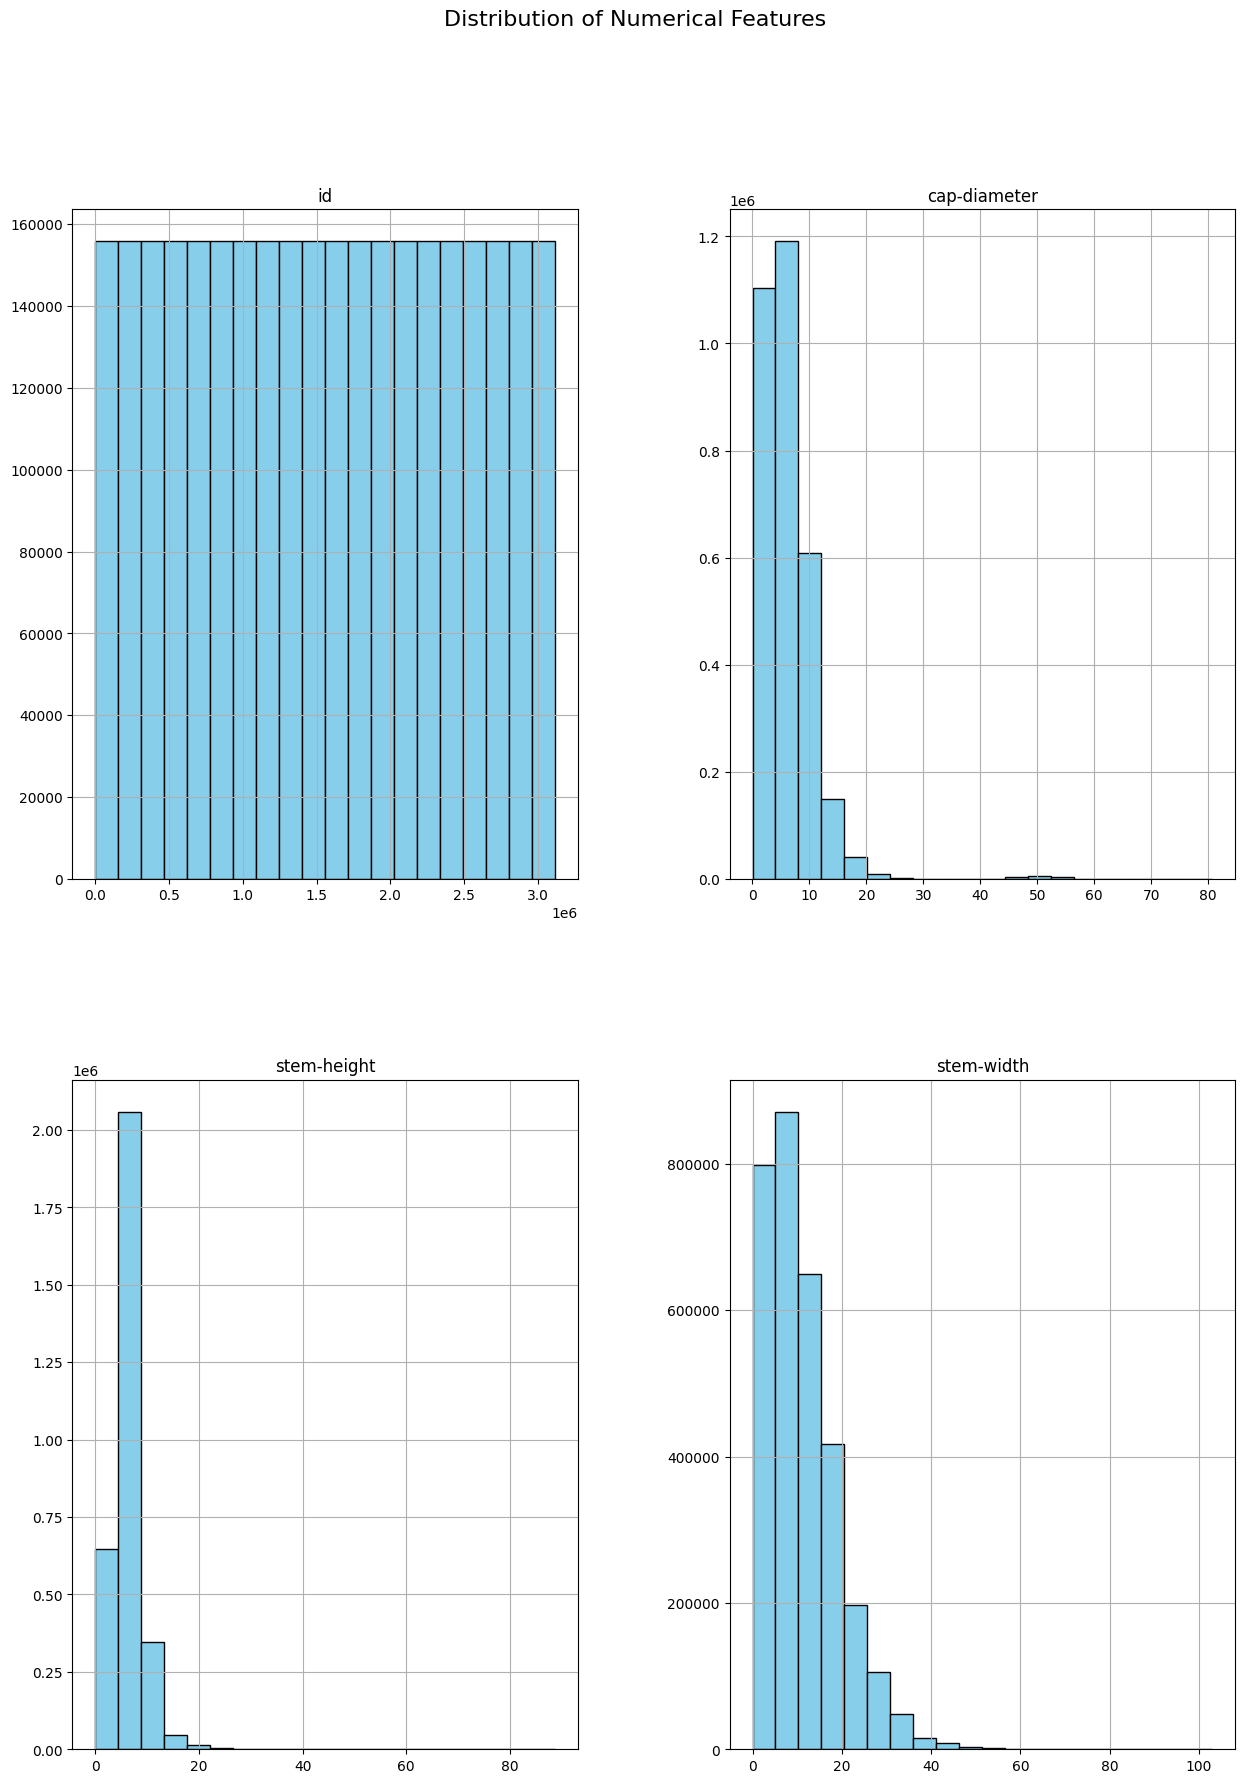

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
train_df.hist(figsize=(15, 20), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


In [ ]:
for column in train_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(train_df[column], fill=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
train_df.head()

In [ ]:
import pandas as pd

# Calculate the percentage of missing data in each column
missing_data_percentage = train_df.isnull().sum() / len(train_df) * 100

# Filter and display columns with missing data
missing_data_percentage = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

# Display the result
print(missing_data_percentage)


# Dropping Missign Values More than 50%

In [19]:
missing_value_precentage = train_df.isnull().sum() / len(train_df) *100
missing_value_precentage[missing_value_precentage >0].sort_values(ascending= False)

,0
veil-type,94.884350
spore-print-color,91.425482
stem-root,88.452732
veil-color,87.936970
stem-surface,63.551362
gill-spacing,40.373988
cap-surface,21.528227
gill-attachment,16.809280
ring-type,4.134818
gill-color,0.001829


In [16]:
# Define a threshold for dropping columns
threshold = 50

# Calculate missing data percentage
missing_data_percentage = train_df.isnull().mean() * 100

# Drop columns where more than 50% of the data is missing
train_df_cleaned = train_df.loc[:, missing_data_percentage[missing_data_percentage <= threshold].index]


In [17]:
print(f"Remaining columns after dropping: {train_df_cleaned.columns}")


Remaining columns after dropping: Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')


In [21]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-color            object 
 13  has-ring              object 
 14  ring-type             object 
 15  habitat               object 
 16  season                object 
dtypes: float64(3), int64(1), object(13)
memory usage: 404.3+ MB


In [42]:
train_df_cleaned = train_df_cleaned.drop(columns=['id'])


In [41]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-color            object 
 13  has-ring              object 
 14  ring-type             object 
 15  habitat               object 
 16  season                object 
dtypes: float64(3), int64(1), object(13)
memory usage: 404.3+ MB


Now i have to impute the missing values and encode them in numerical form to then feed them into correaltion matrix to perform feature selection

In [ ]:
train_df_cleaned = train_df_cleaned.drop('gill-spacing', axis=1)


In [ ]:
train_df_cleaned.isnull().sum()

In [ ]:
train_df_cleaned = train_df_cleaned.drop('gill-spacing', axis=1)


In [ ]:
train_df_cleaned.isnull().sum()

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = train_df_cleaned.corr()

# Step 2: Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Matrix of Train DataFrame', fontsize=16)

# Show the plot
plt.show()


ValueError: could not convert string to float: 'e'

In [46]:
import pandas as pd

def get_unique_values_by_number(train_df_cleaned):
  """
  Counts the number of unique values in each column of a DataFrame.

  Args:
    df: The Pandas DataFrame to analyze.

  Returns:
    A dictionary mapping column names to the number of unique values in each column.
  """

  unique_values = {}
  for col in train_df_cleaned.columns:
    unique_values[col] = train_df_cleaned[col].nunique()
  return unique_values

# Assuming you have a DataFrame named 'train_df'
unique_counts = get_unique_values_by_number(train_df_cleaned)

# Print the results
for col, count in unique_counts.items():
  print(f"{col}: {count} unique values")

class: 2 unique values
cap-diameter: 3913 unique values
cap-shape: 74 unique values
cap-surface: 83 unique values
cap-color: 78 unique values
does-bruise-or-bleed: 26 unique values
gill-attachment: 78 unique values
gill-spacing: 48 unique values
gill-color: 63 unique values
stem-height: 2749 unique values
stem-width: 5836 unique values
stem-color: 59 unique values
has-ring: 23 unique values
ring-type: 40 unique values
habitat: 52 unique values
season: 4 unique values


In [47]:
train_df_cleaned.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a


Imputed train_df:
         class  cap-diameter cap-shape cap-surface cap-color  \
0           e          8.80         f           s         u   
1           p          4.51         x           h         o   
2           e          6.94         f           s         b   
3           e          3.88         f           y         g   
4           e          5.85         x           l         w   
...       ...           ...       ...         ...       ...   
3116940     e          9.29         f         nan         n   
3116941     e         10.88         s         nan         w   
3116942     p          7.82         x           e         e   
3116943     e          9.45         p           i         n   
3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          f               a            c          w   
1                          f               a            c          n   
2       

In [48]:
train_df_cleaned.isnull().sum()

,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57
stem-height,0


In [49]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder

numerical_cols = train_df_cleaned.select_dtypes(include=  ['float64', 'int64']).columns
categorical_cols = train_df_cleaned.select_dtypes(include = ['object']).columns

mean_imputer = SimpleImputer(strategy = 'mean')

train_df_cleaned[numerical_cols]  =  mean_imputer.fit_transform(train_df_cleaned[numerical_cols])

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_df_cleaned[col] =  le.fit_transform(train_df_cleaned[col].astype(str))
  label_encoders[col] = le

knn_imputer = KNNImputer(n_neighbors =3)
train_df_cleaned[categorical_cols] =  knn_imputer.fit_transform(train_df_cleaned[categorical_cols])

for col in categorical_cols:
  le = label_encoders[col]
  train_df_cleaned[col] = le.inverse_transform(train_df_cleaned[col].round().astype(int))
print('Imputed train_df: \n', train_df_cleaned)

Imputed train_df: 
         class  cap-diameter cap-shape cap-surface cap-color  \
0           e          8.80         f           s         u   
1           p          4.51         x           h         o   
2           e          6.94         f           s         b   
3           e          3.88         f           y         g   
4           e          5.85         x           l         w   
...       ...           ...       ...         ...       ...   
3116940     e          9.29         f         nan         n   
3116941     e         10.88         s         nan         w   
3116942     p          7.82         x           e         e   
3116943     e          9.45         p           i         n   
3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          f               a            c          w   
1                          f               a            c          n   
2      

In [50]:
train_df_cleaned

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,nan,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,l,w,f,d,nan,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,nan,n,t,nan,nan,w,12.14,18.81,w,t,g,d,u
3116941,e,10.88,s,nan,w,t,d,c,p,6.65,26.97,w,f,f,d,u
3116942,p,7.82,x,e,e,f,a,nan,w,9.51,11.06,y,t,z,d,a
3116943,e,9.45,p,i,n,t,e,nan,p,9.13,17.77,w,t,p,d,u


In [51]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                object 
dtypes: float64(3), object(13)
memory usage: 380.5+ MB


## Apllying scale to preprocessing

In [52]:
from sklearn.preprocessing import StandardScaler

numerical_cols = train_df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical columns
train_df_cleaned[numerical_cols] = scaler.fit_transform(train_df_cleaned[numerical_cols])


### Here's how you can apply frequency encoding to the categorical columns in the train_df object:


In [53]:

# Get categorical columns
categorical_cols = train_df_cleaned.select_dtypes(include=['object']).columns

# Apply frequency encoding
for col in categorical_cols:
    frequency_map = train_df_cleaned[col].value_counts().to_dict()
    train_df_cleaned[col] = train_df_cleaned[col].map(frequency_map)


In [54]:
train_df_cleaned.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1411549,0.534605,676238,384970,73172,2569743,646034,1331054,931538,-0.680926,0.523282,1196637,2368820,2477170,2177573,1543321
1,1705396,-0.386405,1436026,284460,178847,2569743,646034,1331054,543386,-0.577213,-0.577333,111541,747982,113780,2177573,278189
2,1411549,0.135286,676238,384970,61313,2569743,360878,1331054,931538,0.185819,-0.151169,1003464,2368820,2477170,171892,278189
3,1411549,-0.521659,676238,327826,210825,2569743,295439,1258435,212164,-0.810568,-0.571157,1196637,2368820,2477170,2177573,1153588
4,1411549,-0.098724,1436026,44859,379442,2569743,589236,1258435,931538,-1.103187,-0.345105,1196637,2368820,2477170,454908,1543321
5,1705396,-0.431490,1436026,460777,1359542,2569743,295439,1331054,543386,-0.162360,-0.364869,1196637,747982,113780,2177573,1543321
6,1411549,0.717090,106967,327826,379442,2569743,301858,1331054,127970,4.712157,0.189762,1196637,747982,120006,454908,278189
7,1705396,-0.377818,1436026,119712,197290,2569743,646034,1258435,469464,0.726609,-0.170933,373971,747982,113780,2177573,1543321
8,1705396,0.225455,676238,284460,197290,2569743,360878,407932,931538,-0.214217,0.738217,1196637,2368820,2477170,2177573,1543321
9,1411549,0.030089,1436026,460777,1359542,2569743,646034,407932,931538,0.289533,0.199644,103373,2368820,2477170,2177573,1543321


In [55]:
corr_matrix = train_df_cleaned.corr()
# Display correlation matrix
print(corr_matrix)


                         class  cap-diameter  cap-shape  cap-surface  \
class                 1.000000     -0.162626  -0.084182    -0.074607   
cap-diameter         -0.162626      1.000000   0.003870     0.036037   
cap-shape            -0.084182      0.003870   1.000000    -0.068024   
cap-surface          -0.074607      0.036037  -0.068024     1.000000   
cap-color            -0.102526     -0.027035   0.047685    -0.006618   
does-bruise-or-bleed  0.037554     -0.239071  -0.009148     0.022331   
gill-attachment       0.160445     -0.233805  -0.052831    -0.092936   
gill-spacing          0.102697      0.078285   0.041502    -0.044788   
gill-color           -0.093016      0.119236   0.144086     0.028410   
stem-height          -0.049740      0.364063   0.059921     0.071250   
stem-width           -0.169807      0.746316   0.018067     0.143190   
stem-color           -0.150301      0.094676  -0.011827     0.011331   
has-ring             -0.049622     -0.098940  -0.078866     0.00

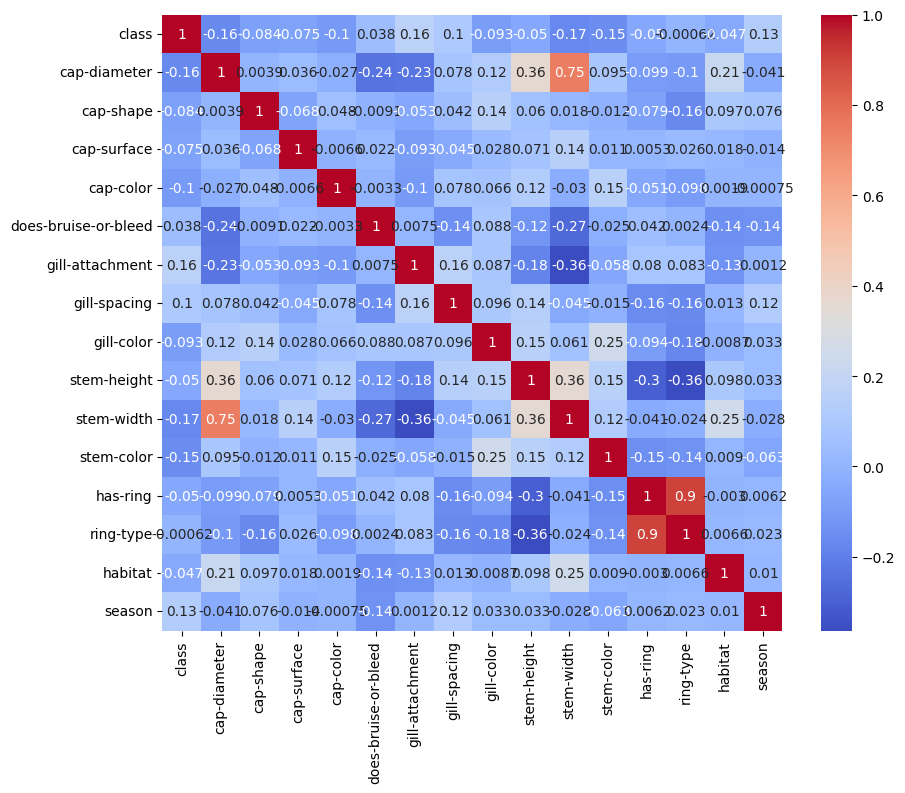

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = train_df_cleaned.drop('class', axis=1)
y = train_df_cleaned['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model with default parameters
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
